In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
from glob import glob
from os.path import join
from skimage.feature import peak_local_max, canny
from skimage.draw import circle, circle_perimeter

%matplotlib notebook

directory_name = r"C:\Users\Sumita\Documents\Research\Microspheres\birefringent measurements\sphere images"
directory_name = directory_name + r'\2019-05-09'

pixels_per_micron = 748.356 / 210.

folder_name_list = ['alumina_birefringence',
                    'corpuscular_silica_15um_birefringence',
                    'corpuscular_silica_15um_birefringence_2',
                    'gadi_vaterite_birefringence',
                    'gadi_vaterite_birefringence_2',
                    'german_11um_vaterite_birefringence',
                    'german_11um_vaterite_birefringence_2',
                    'german_11um_vaterite_birefringence_3',
                    'german_22um_silica_birefringence',
                    'german_8um_vaterite_birefringence',
                    'german_8um_vaterite_birefringence_2']

In [2]:
folder_name_list[6]

'german_11um_vaterite_birefringence_2'

First we load the image stack and its associated polarizer angle

In [21]:
folder_name = directory_name + '\\' + folder_name_list[7]

npzfile = np.load(folder_name + '\\image_stack.npz')
image_stack = npzfile['image_stack']
degrees = npzfile['degrees']
background = npzfile['background']

In [22]:
n, nj, nk = image_stack.shape

sigma = 10

summed_edges_stack = np.array(canny(image_stack[0], sigma=sigma), dtype=int)

for i in range(1, n):
    summed_edges_stack += np.array(canny(image_stack[i], sigma=sigma), dtype=int)

In [23]:
image_stack.shape

(37L, 480L, 752L)

<IPython.core.display.Javascript object>


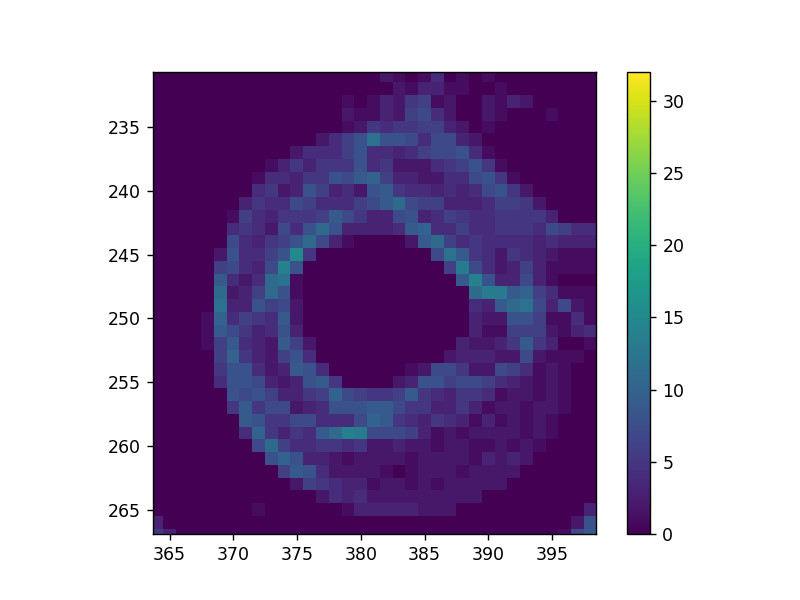

In [24]:
plt.figure()
plt.imshow(summed_edges_stack)
plt.colorbar()
plt.show()

Pick a sphere to use for alignment

In [25]:
start_j = 233; end_j = 267; reduced_nj = end_j - start_j
start_k = 365; end_k = 399; reduced_nk = end_k - start_k

np.savez(folder_name + '\\single_sphere_coords.npz', start_j=start_j, end_j=end_j, start_k=start_k, end_k=end_k)

# %matplotlib inline

In [14]:
# checking that every folder now has a file called single_sphere_coords.npz
for folder in folder_name_list:
    folder_name = directory_name + '\\' + folder
    f = np.load(folder_name + '\\single_sphere_coords.npz')
    print f['start_j'], f['end_j'], f['start_k'], f['end_k']

155 191 562 598
110 190 590 670
165 230 310 375
25 60 620 655
105 140 340 375
140 210 170 240
195 265 265 345
110 195 215 295
140 250 0 110
340 400 220 280
300 390 370 460


In [2]:
from os.path import getmtime

directory_name = r"C:\Users\Sumita\Documents\Research\Microspheres\birefringent measurements\sphere images"
directory_name = directory_name + r'\2019-05-09'

pixels_per_micron = 748.356 / 210.

folder_name_list = ['alumina_birefringence',
                    'corpuscular_silica_15um_birefringence',
                    'corpuscular_silica_15um_birefringence_2',
                    'gadi_vaterite_birefringence',
                    'gadi_vaterite_birefringence_2',
                    'german_11um_vaterite_birefringence',
                    'german_22um_silica_birefringence',
                    'german_8um_vaterite_birefringence',
                    'german_8um_vaterite_birefringence_2']

for folder in folder_name_list:
    og_path = directory_name + '\\' + folder + '\\single_sphere_coords.npz'
    ed_path = directory_name + '_reduced\\' + folder + '\\single_sphere_coords.npz'
    print folder, getmtime(og_path), getmtime(ed_path)

    f = np.load(og_path)
    print f['start_j'], f['end_j'], f['start_k'], f['end_k']

    f = np.load(ed_path)
    print f['start_j'], f['end_j'], f['start_k'], f['end_k']
    
    print ''

alumina_birefringence 1557778754.0 1557778754.0
155 191 562 598
155 191 562 598

corpuscular_silica_15um_birefringence 1557720266.39 1557720266.0
110 190 590 670
110 190 590 670

corpuscular_silica_15um_birefringence_2 1557720375.93 1557720375.0
165 230 310 375
165 230 310 375

gadi_vaterite_birefringence 1557523741.23 1557523741.0
25 60 620 655
25 60 620 655

gadi_vaterite_birefringence_2 1557593633.95 1557593633.0
180 240 100 160
180 240 100 160

german_11um_vaterite_birefringence 1557598082.68 1557598082.0
130 210 170 240
130 210 170 240

german_22um_silica_birefringence 1557594011.21 1557594011.0
140 250 0 110
140 250 0 110

german_8um_vaterite_birefringence 1557598575.74 1557598575.0
360 410 460 510
360 410 460 510

german_8um_vaterite_birefringence_2 1557594308.51 1557594308.0
10 80 0 70
10 80 0 70



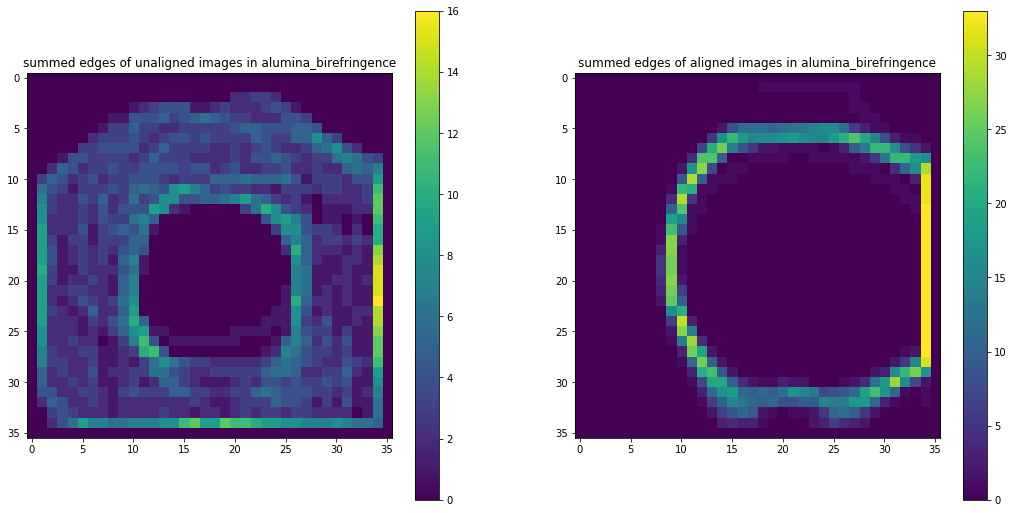

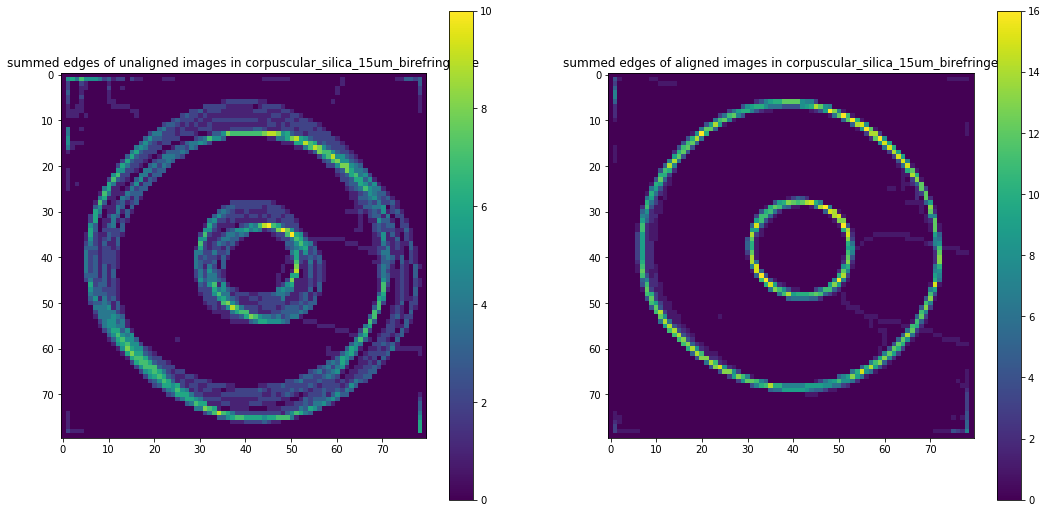

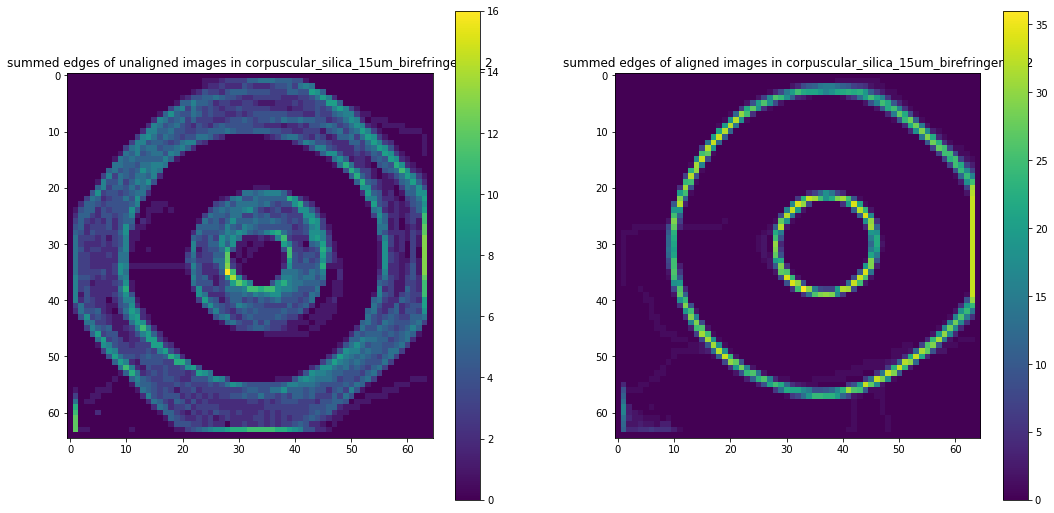

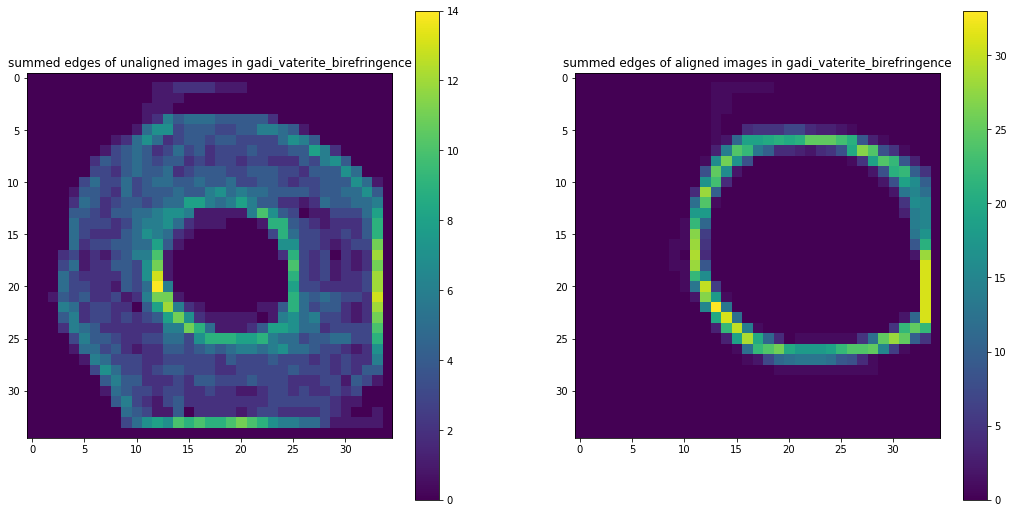

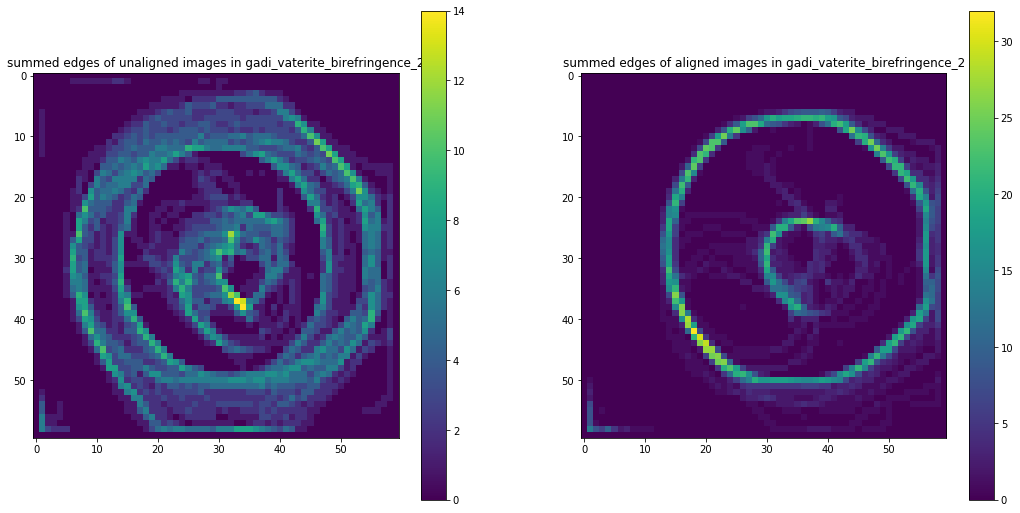

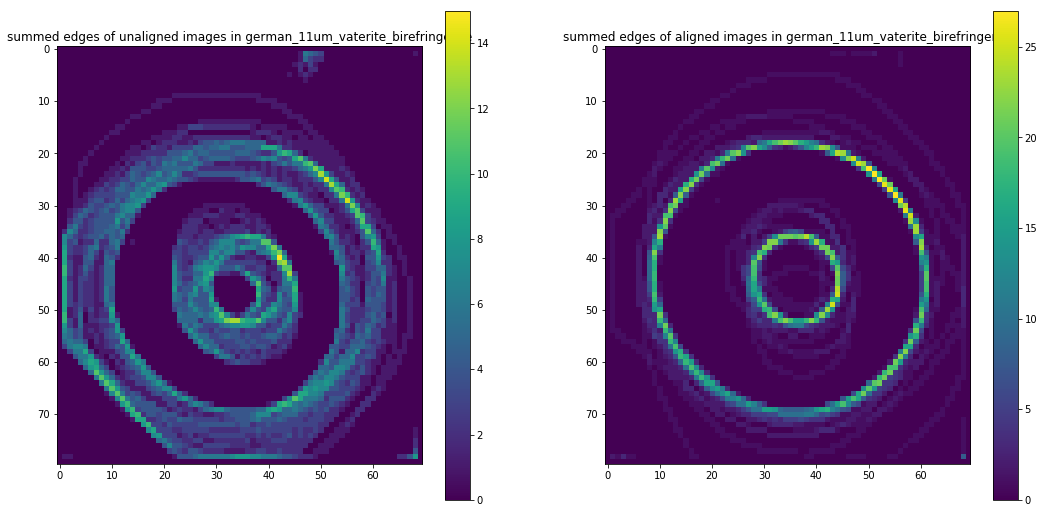

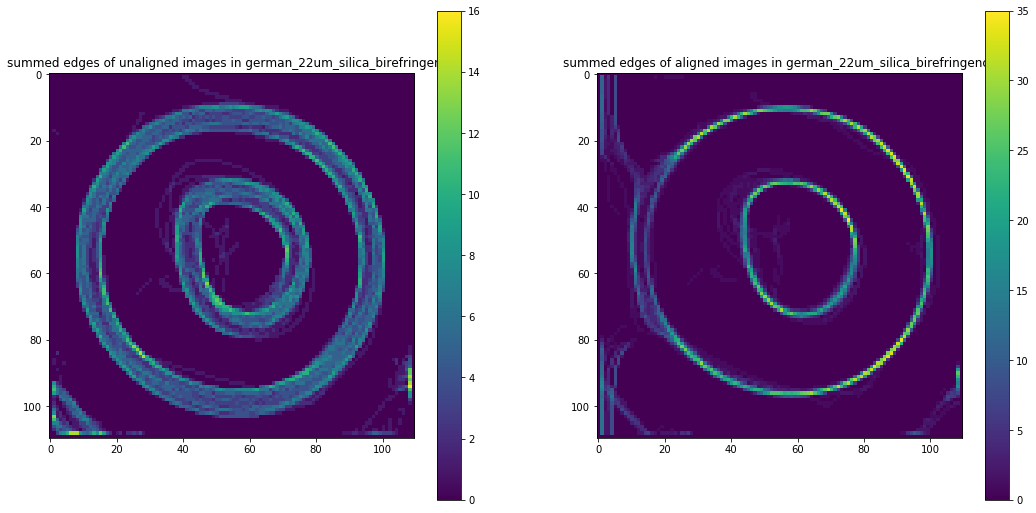

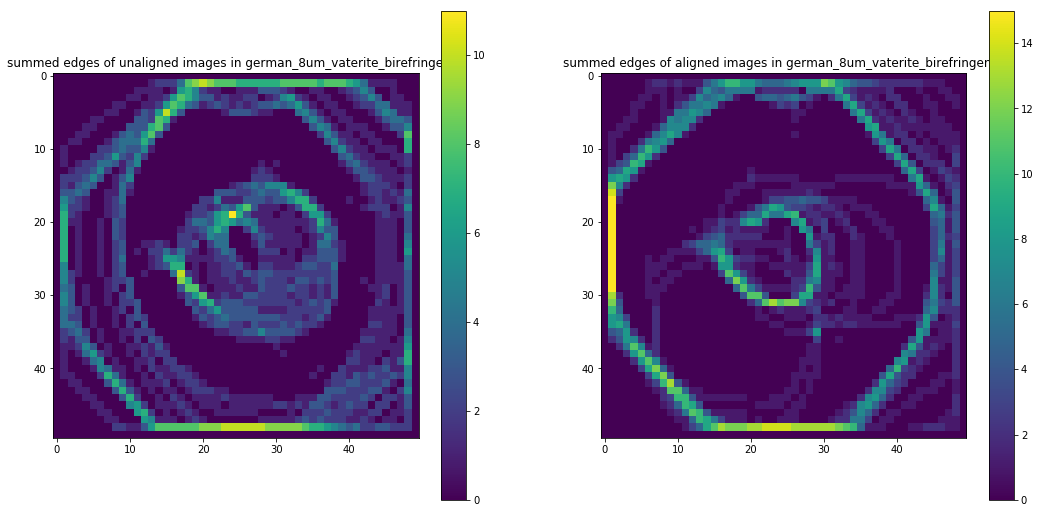

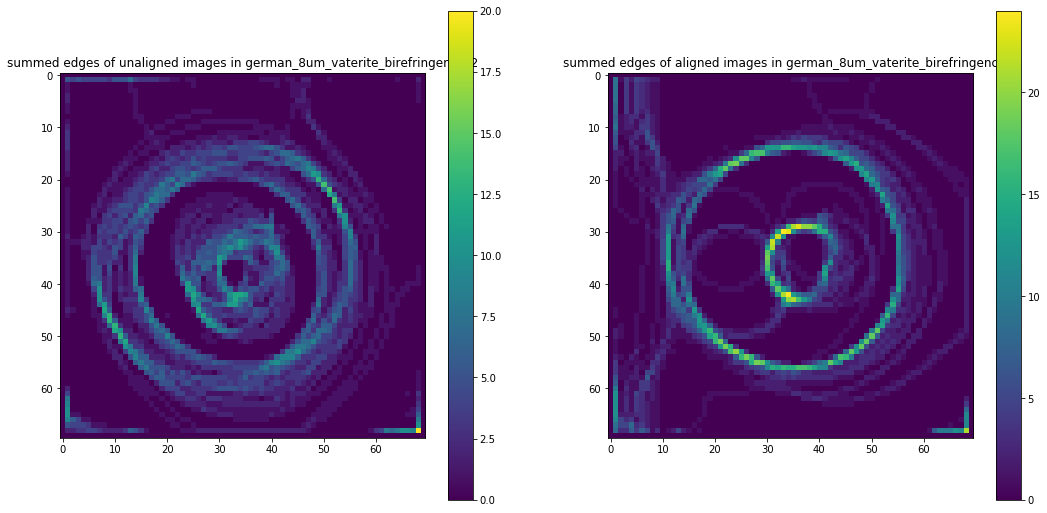

In [4]:
%matplotlib inline

for folder in folder_name_list:
    folder_name = directory_name + '\\' + folder
    f = np.load(folder_name + '\\single_sphere_coords.npz')
    j_start = f['start_j']; j_end = f['end_j']
    k_start = f['start_k']; k_end = f['end_k']
    
    f = np.load(folder_name + '\\image_stack.npz')
    og_im = f['image_stack']
    og_im = og_im[:, j_start:j_end, k_start:k_end]
    og_sum = np.array(canny(og_im[0], sigma=8), dtype=int)
    for im in og_im[1:]:
        og_sum += np.array(canny(im, sigma=8), dtype=int)
    
    f = np.load(folder_name + '\\aligned_image_stack.npz')
    ed_im = f['image_stack']
    ed_im = ed_im[:, j_start:j_end, k_start:k_end]
    ed_sum = np.array(canny(ed_im[0], sigma=8), dtype=int)
    for im in ed_im[1:]:
        ed_sum += np.array(canny(im, sigma=8), dtype=int)
        
    plt.figure(figsize=(18, 9))

    plt.subplot(1, 2, 1)

    plt.imshow(og_sum)
    plt.colorbar()
    plt.title('summed edges of unaligned images in ' + folder)

    plt.subplot(1, 2, 2)

    plt.imshow(ed_sum)
    plt.colorbar()
    plt.title('summed edges of aligned images in ' + folder)

    plt.show()

cropped_edge_array = edges_stack[:, start_j:end_j, start_k:end_k]

plt.figure(figsize=(10,5))
plt.imshow(np.sum(cropped_edge_array, axis=0))
plt.show()

npzfile = np.load(folder_name + '\\single_sphere_coords.npz')
print npzfile['start_j']

In [ ]:
folder_name_list = ['alumina_birefringence',
                    'corpuscular_silica_15um_birefringence',
                    'corpuscular_silica_15um_birefringence_2',
                    'gadi_vaterite_birefringence',
                    'gadi_vaterite_birefringence_2',
                    'german_11um_vaterite_birefringence',
                    'german_22um_silica_birefringence',
                    'german_8um_vaterite_birefringence',
                    'german_8um_vaterite_birefringence_2']

In [18]:
for folder in folder_name_list:
    folder_name = directory_name + '\\' + folder
    f = np.load(folder_name + '\\aligned_simple_intensity_sinusoid_amplitudes.npz')
    print f['constant'].shape

(480L, 752L)
(480L, 752L)
(480L, 752L)
(480L, 752L)
(480L, 752L)
(480L, 752L)
(480L, 752L)
(480L, 752L)
(480L, 752L)
